## EDA  data incelemesi: ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/datasets/Frogs_MFCCs.csv")

print("Dataset Shape (rows, columns):")
print(df.shape)
print("\n")

print("First 5 rows:")
display(df.head())

print("Last 5 rows:")
display(df.tail())

print("Column names:")
print(df.columns.tolist())
print("\n")

print("Data Info:")
df.info()
print("\n")

print("Missing values per column:")
display(df.isnull().sum())

print("\nTotal missing values in dataset:", df.isnull().sum().sum())
print("\n")

num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")
print("\n")

print("Numerical feature statistics:")
display(df.describe().T)

categorical_cols = df.select_dtypes(include=["object"]).columns

print("Categorical feature value counts:\n")
for col in categorical_cols:
    print(f"--- {col} ---")
    display(df[col].value_counts())
    print("\n")

print("Number of unique values per column:")
display(df.nunique())

print("Data types summary:")
display(df.dtypes.value_counts())

print("MFCC value range (global):")
mfcc_cols = [c for c in df.columns if "MFCC" in c]
print("Min:", df[mfcc_cols].min().min())
print("Max:", df[mfcc_cols].max().max())
-


Dataset Shape (rows, columns):
(7195, 26)


First 5 rows:


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


Last 5 rows:


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60
7194,1.0,-0.508833,-0.324106,0.062068,0.078211,0.397188,0.094596,-0.117672,0.058874,0.076180,...,0.061455,0.072983,-0.003980,0.031560,-0.029355,-0.087910,Hylidae,Scinax,ScinaxRuber,60


Column names:
['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus', 'Species', 'RecordID']


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13

,0
MFCCs_ 1,0
MFCCs_ 2,0
MFCCs_ 3,0
MFCCs_ 4,0
MFCCs_ 5,0
MFCCs_ 6,0
MFCCs_ 7,0
MFCCs_ 8,0
MFCCs_ 9,0
MFCCs_10,0



Total missing values in dataset: 0


Number of duplicated rows: 0


Numerical feature statistics:


,count,mean,std,min,25%,50%,75%,max
MFCCs_ 1,7195.0,0.989885,0.069016,-0.251179,1.000000,1.000000,1.000000,1.000000
MFCCs_ 2,7195.0,0.323584,0.218653,-0.673025,0.165945,0.302184,0.466566,1.000000
MFCCs_ 3,7195.0,0.311224,0.263527,-0.436028,0.138445,0.274626,0.430695,1.000000
MFCCs_ 4,7195.0,0.445997,0.160328,-0.472676,0.336737,0.481463,0.559861,1.000000
MFCCs_ 5,7195.0,0.127046,0.162722,-0.636012,0.051717,0.161361,0.222592,0.752246
MFCCs_ 6,7195.0,0.097939,0.120412,-0.410417,0.012581,0.072079,0.175957,0.964240
MFCCs_ 7,7195.0,-0.001397,0.171404,-0.538982,-0.125737,-0.052630,0.085580,1.000000
MFCCs_ 8,7195.0,-0.000370,0.116302,-0.576506,-0.063109,0.013265,0.075108,0.551762
MFCCs_ 9,7195.0,0.128213,0.179008,-0.587313,0.004648,0.189317,0.265395,0.738033
MFCCs_10,7195.0,0.055998,0.127099,-0.952266,-0.001132,0.063478,0.117725,0.522768


Categorical feature value counts:

--- Family ---


,count
Family,
Leptodactylidae,4420
Hylidae,2165
Dendrobatidae,542
Bufonidae,68




--- Genus ---


,count
Genus,
Adenomera,4150
Hypsiboas,1593
Ameerega,542
Dendropsophus,310
Leptodactylus,270
Scinax,148
Osteocephalus,114
Rhinella,68




--- Species ---


,count
Species,
AdenomeraHylaedactylus,3478
HypsiboasCordobae,1121
AdenomeraAndre,672
Ameeregatrivittata,542
HypsiboasCinerascens,472
HylaMinuta,310
LeptodactylusFuscus,270
ScinaxRuber,148
OsteocephalusOophagus,114




Number of unique values per column:


,0
MFCCs_ 1,249
MFCCs_ 2,7140
MFCCs_ 3,7026
MFCCs_ 4,7175
MFCCs_ 5,7195
MFCCs_ 6,7195
MFCCs_ 7,7195
MFCCs_ 8,7195
MFCCs_ 9,7195
MFCCs_10,7195


Data types summary:


,count
float64,22
object,3
int64,1


MFCC value range (global):
Min: -0.952265655557829
Max: 1.0


# Dataset özellikleri:

Bu veri seti, kurbağa ses kayıtlarından elde edilen MFCC (Mel-Frequency Cepstral Coefficients) özelliklerini içermekte olup, biyolojik sınıflandırma (Family, Genus, Species) problemleri için tasarlanmıştır.

Toplam gözlem (satır) sayısı: 7.195
Toplam değişken (sütun) sayısı: 26

### Değişken Türleri

    Sayısal değişkenler (22 adet):
    MFCCs_1 – MFCCs_22

    Kategorik değişkenler (3 adet):
    Family, Genus, Species

    Tanımlayıcı değişken (1 adet):
    RecordID (kayıt kimliği)

    -> eksik ve yinelenen değerler bulunmamaktadır.

### Hedef Değişkenlerin Dağılımı
### Family (4 sınıf)

    Leptodactylidae: 4.420
    Hylidae: 2.165
    Dendrobatidae: 542
    Bufonidae: 68

### Genus (8 sınıf)

    Adenomera: 4.150
    Hypsiboas: 1.593
    Ameerega: 542
    Dendropsophus: 310
    Leptodactylus: 270
    Scinax: 148
    Osteocephalus: 114
    Rhinella: 68

### Species (10 sınıf)

    AdenomeraHylaedactylus: 3.478
    HypsiboasCordobae: 1.121
    AdenomeraAndre: 672
    Ameeregatrivittata: 542
    HypsiboasCinerascens: 472
    HylaMinuta: 310
    LeptodactylusFuscus: 270
    ScinaxRuber: 148
    OsteocephalusOophagus: 114
    Rhinellagranulosa: 68

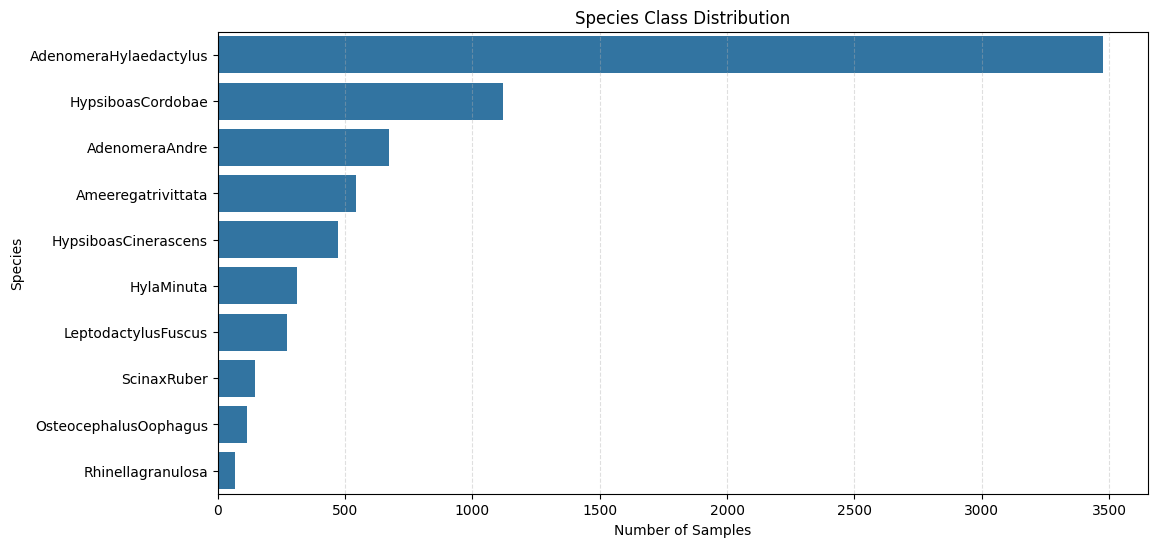

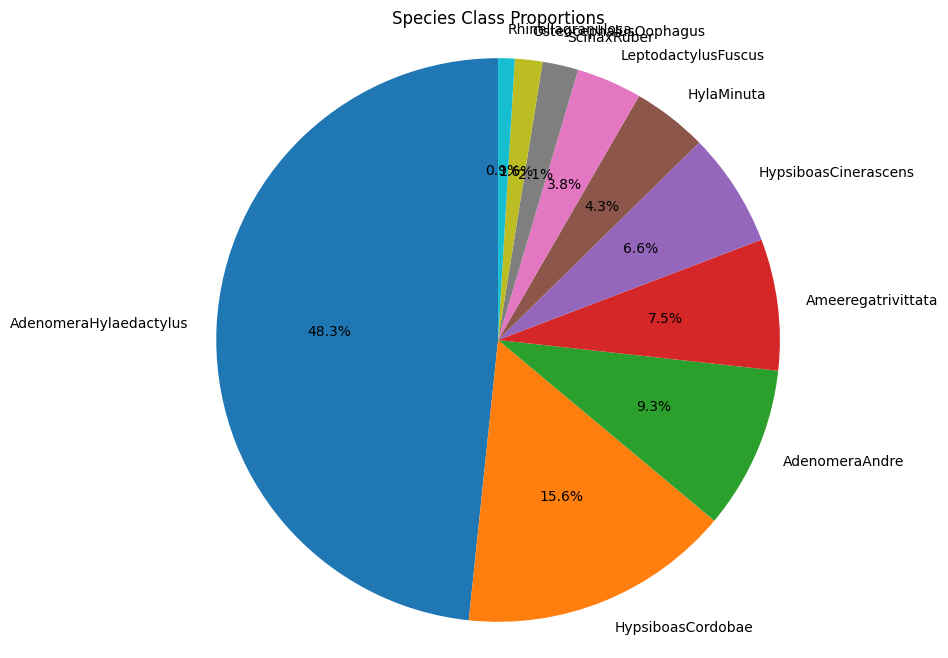

,Count,Percentage (%)
Species,,
AdenomeraHylaedactylus,3478,48.339124
HypsiboasCordobae,1121,15.580264
AdenomeraAndre,672,9.339819
Ameeregatrivittata,542,7.533009
HypsiboasCinerascens,472,6.560111
HylaMinuta,310,4.308548
LeptodactylusFuscus,270,3.752606
ScinaxRuber,148,2.056984
OsteocephalusOophagus,114,1.584434


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(
    y="Species",
    data=df,
    order=df["Species"].value_counts().index
)

plt.title("Species Class Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Species")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()

species_counts = df["Species"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Species Class Proportions")
plt.axis("equal")
plt.show()

species_dist = pd.DataFrame({
    "Count": species_counts,
    "Percentage (%)": 100 * species_counts / species_counts.sum()
})

species_dist


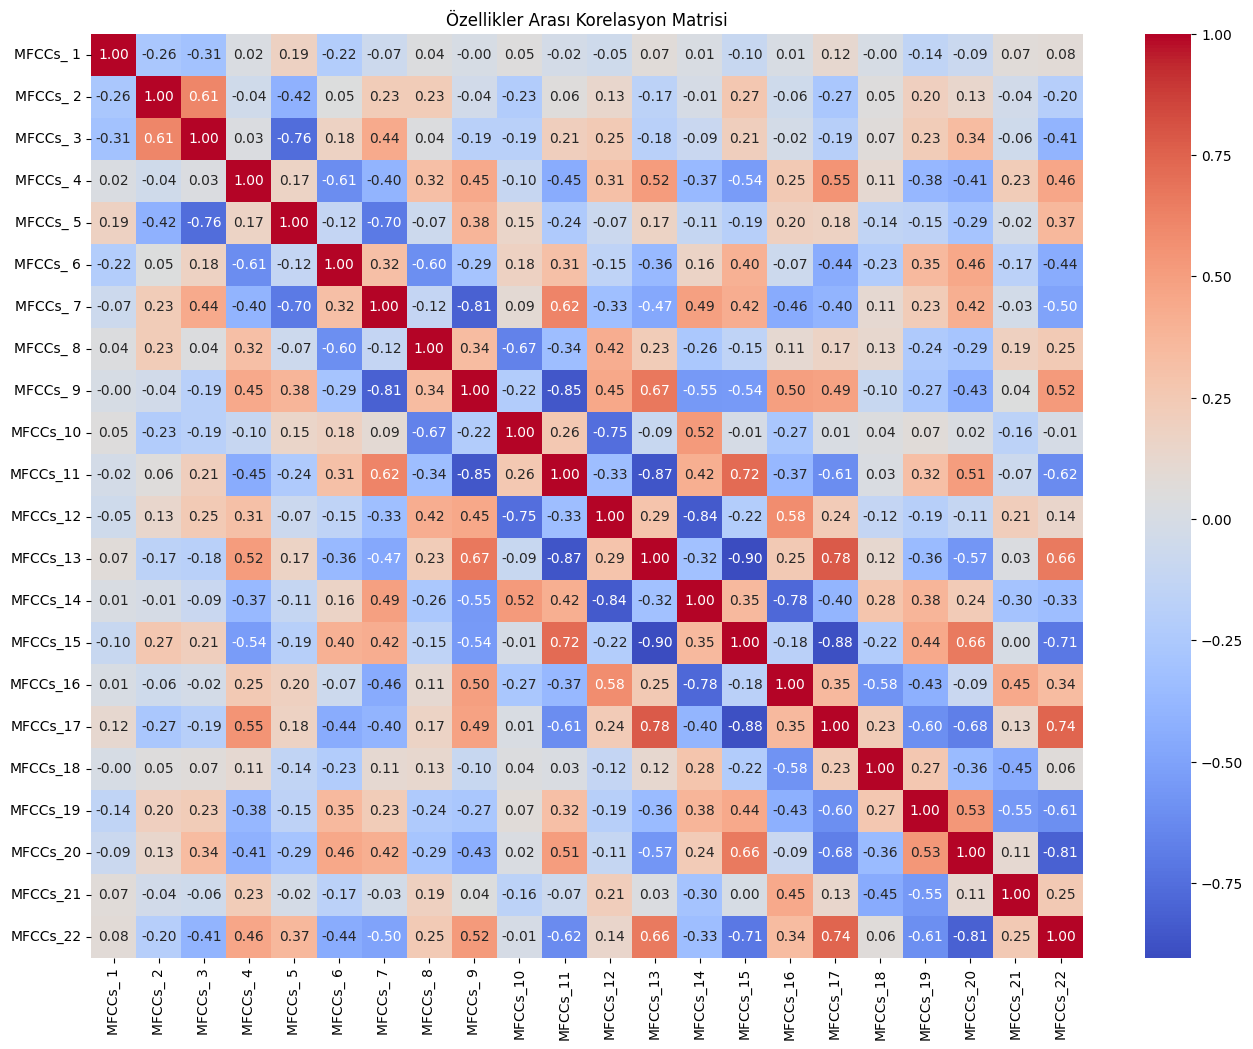

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
# Özellikler arası korelasyon
# Sadece MFCCs sütunlarını seçerek korelasyon matrisini hesapla
mfcc_cols = [col for col in df.columns if 'MFCCs' in col]
corr_matrix = df[mfcc_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


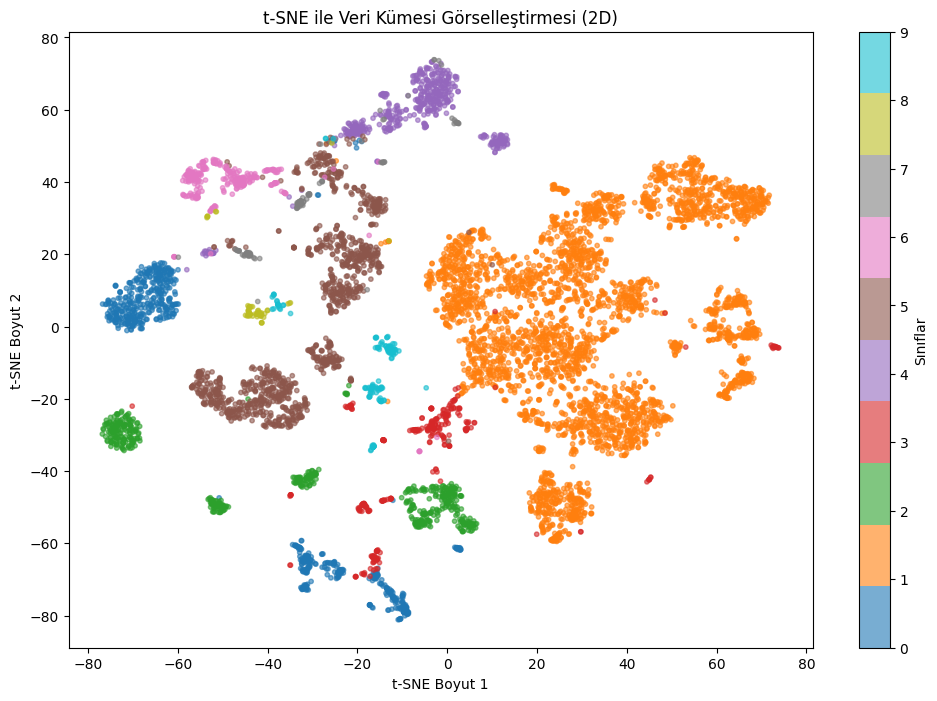

In [ ]:
from sklearn.manifold import TSNE

# Bu işlem veri boyutuna göre biraz zaman alabilir
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_encoded, cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label="Sınıflar")
plt.title("t-SNE ile Veri Kümesi Görselleştirmesi (2D)")
plt.xlabel("t-SNE Boyut 1")
plt.ylabel("t-SNE Boyut 2")
plt.show()


Isolation Forest tarafından saptanan aykırı satır sayısı: 360


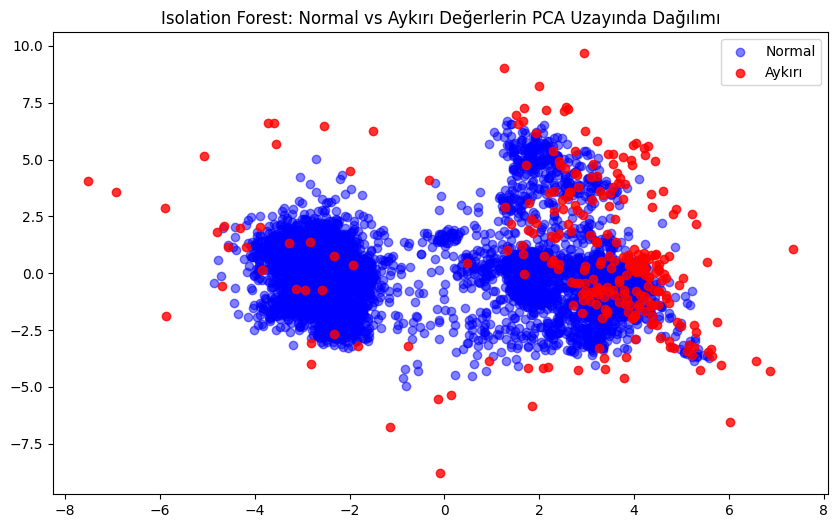

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42) # Verinin %5'i aykırı varsayalım
y_outliers = iso.fit_predict(X)

# -1 olanlar aykırı, 1 olanlar normaldir
print(f"Isolation Forest tarafından saptanan aykırı satır sayısı: {list(y_outliers).count(-1)}")

# Veriyi 2 boyuta indirgeyelim (Görselleştirmek için)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Isolation Forest tahmini (Eğitim seti üzerinde)
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso.fit_predict(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[outlier_preds == 1, 0], X_pca[outlier_preds == 1, 1], c='blue', label='Normal', alpha=0.5)
plt.scatter(X_pca[outlier_preds == -1, 0], X_pca[outlier_preds == -1, 1], c='red', label='Aykırı', alpha=0.8)
plt.legend()
plt.title("Isolation Forest: Normal vs Aykırı Değerlerin PCA Uzayında Dağılımı")
plt.show()

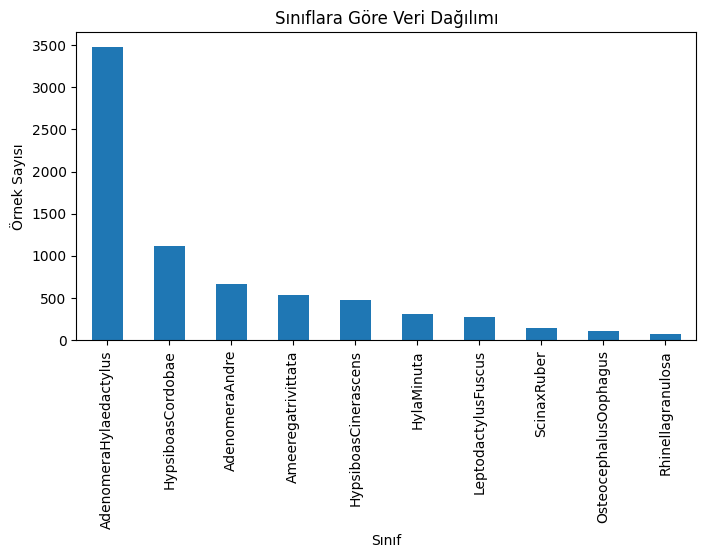

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
class_counts.plot(kind="bar")
plt.xlabel("Sınıf")
plt.ylabel("Örnek Sayısı")
plt.title("Sınıflara Göre Veri Dağılımı")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE


In [ ]:
X = df.filter(regex="MFCCs_")
y = df["Species"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
n_classes = len(class_names)

n_classes, class_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
smote = SMOTE(
    random_state=42,
    k_neighbors=5
)

X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_scaled, y_train
)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_resampled))


Before SMOTE: [ 538 2782  434  248  378  897  216   91   54  118]
After SMOTE : [2782 2782 2782 2782 2782 2782 2782 2782 2782 2782]


In [ ]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    macro_prec = precision_score(y_test, y_pred, average="macro")
    macro_rec  = recall_score(y_test, y_pred, average="macro")
    macro_f1   = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")

    cm = confusion_matrix(y_test, y_pred, normalize="true")

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_names
    )
    disp.plot(
        cmap="Blues",
        xticks_rotation=45,
        values_format=".2f"
    )
    plt.title(f"{name} – Normalized Confusion Matrix")
    plt.show()

    return acc, macro_prec, macro_rec, macro_f1, weighted_f1

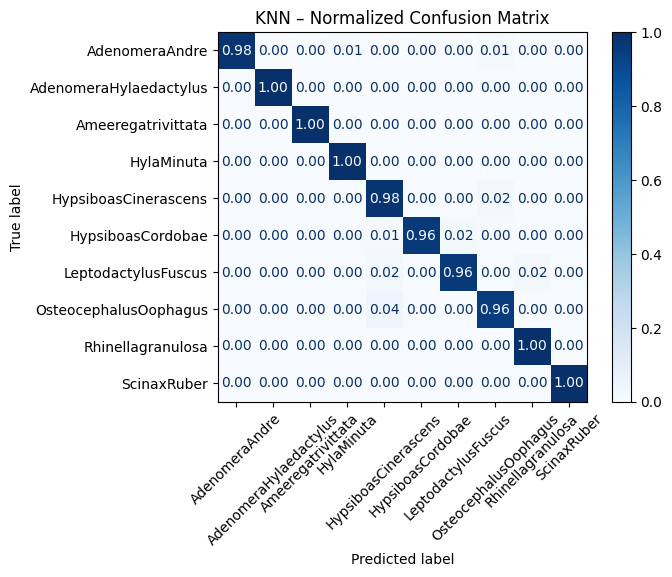

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

knn_acc, knn_macro_prec, knn_macro_rec, knn_macro_f1, knn_weighted_f1 = \
    evaluate_model(knn, X_test_scaled, y_test, "KNN")

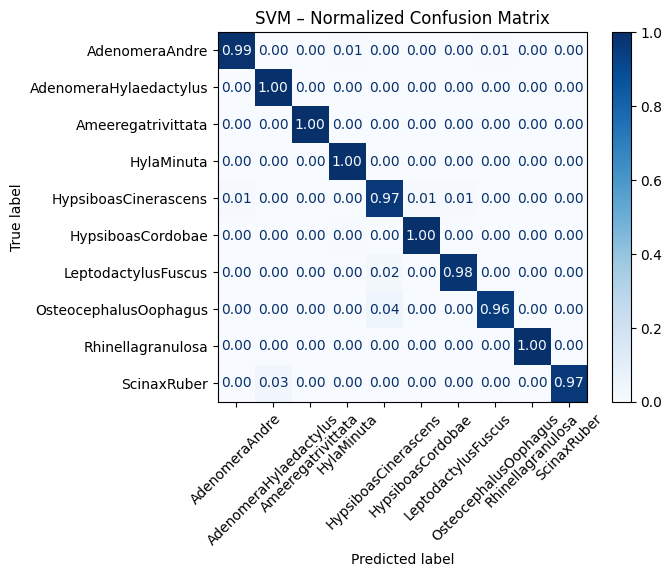

In [ ]:
svm = SVC(kernel="rbf", C=10, gamma="scale")
svm.fit(X_train_scaled, y_train)

svm_acc, svm_macro_prec, svm_macro_rec, svm_macro_f1, svm_weighted_f1 = \
    evaluate_model(svm, X_test_scaled, y_test, "SVM")

Explained variance (PC1 + PC2): 52.22%


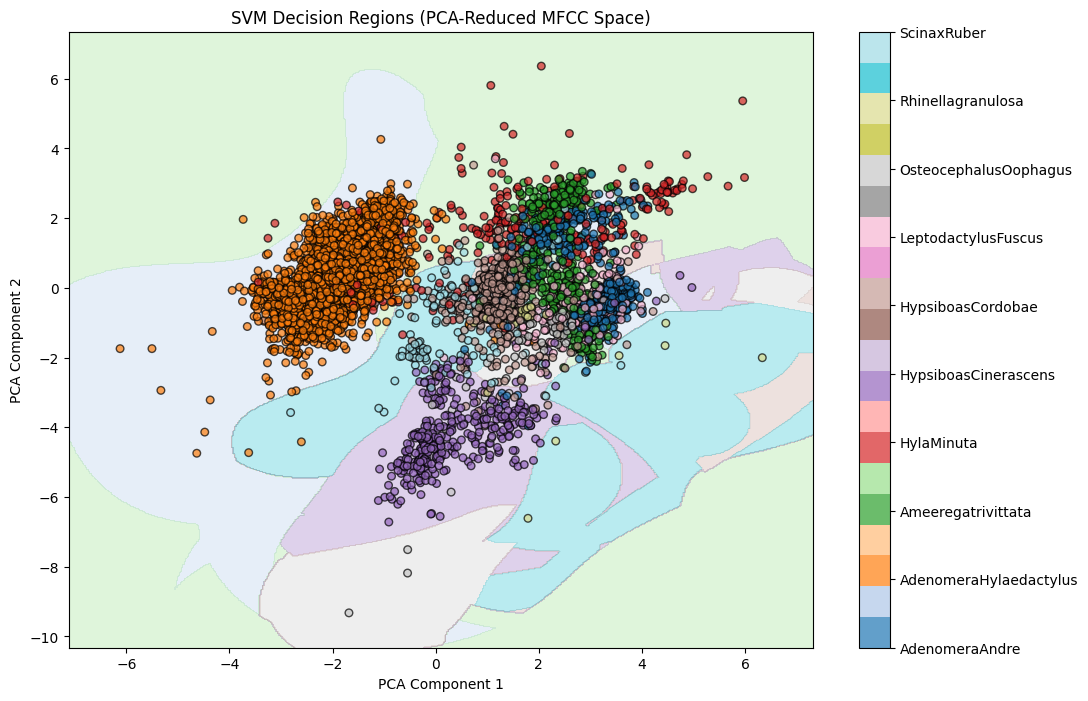

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# ----- 1. PCA: Reduce to 2D for visualization -----
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f"Explained variance (PC1 + PC2): {pca.explained_variance_ratio_.sum():.2%}")

# ----- 2. Train SVM in PCA space (visualization only) -----
svm_pca = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",           # safer than 'auto'
    class_weight="balanced"
)

svm_pca.fit(X_train_pca, y_train)

# ----- 3. Create mesh grid -----
h = 0.03
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# ----- 4. Predict decision regions -----
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# ----- 5. Plot -----
plt.figure(figsize=(12, 8))

plt.contourf(
    xx, yy, Z,
    alpha=0.3,
    cmap="tab20"
)

scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap="tab20",
    edgecolor="k",
    s=30,
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Decision Regions (PCA-Reduced MFCC Space)")

cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(class_names)))
cbar.set_ticklabels(class_names)

plt.show()


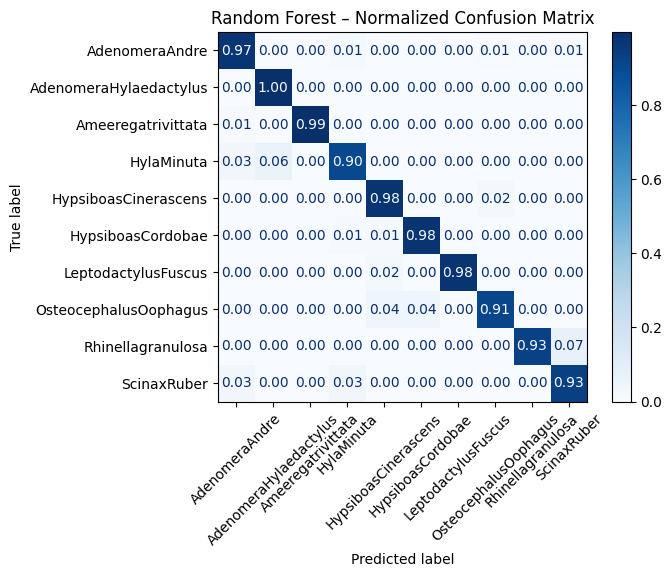

In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_acc, rf_macro_prec, rf_macro_rec, rf_macro_f1, rf_weighted_f1 = \
    evaluate_model(rf, X_test, y_test, "Random Forest")

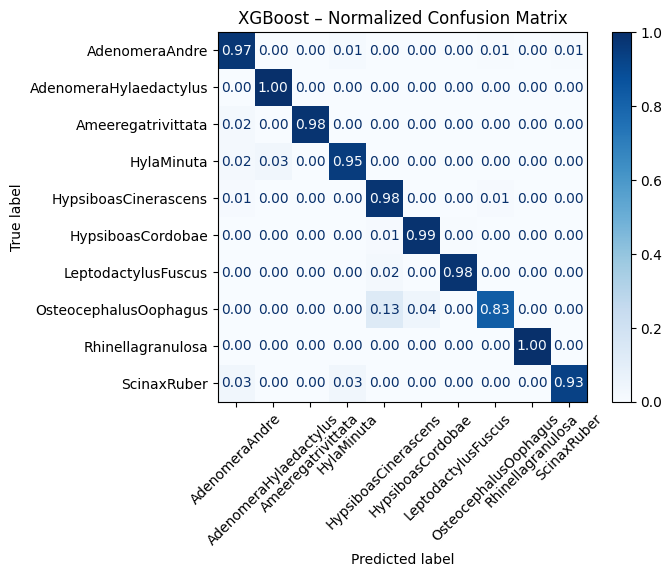

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=n_classes,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_acc, xgb_macro_prec, xgb_macro_rec, xgb_macro_f1, xgb_weighted_f1 = \
    evaluate_model(xgb, X_test, y_test, "XGBoost")

In [ ]:
results = pd.DataFrame({
    "Model": ["KNN", "SVM", "Random Forest", "XGBoost"],
    "Accuracy": [
        knn_acc, svm_acc, rf_acc, xgb_acc
    ],
    "Macro Precision": [
        knn_macro_prec, svm_macro_prec, rf_macro_prec, xgb_macro_prec
    ],
    "Macro Recall": [
        knn_macro_rec, svm_macro_rec, rf_macro_rec, xgb_macro_rec
    ],
    "Macro F1": [
        knn_macro_f1, svm_macro_f1, rf_macro_f1, xgb_macro_f1
    ],
    "Weighted F1": [
        knn_weighted_f1, svm_weighted_f1, rf_weighted_f1, xgb_weighted_f1
    ]
})

results.sort_values("Macro F1", ascending=False)



,Model,Accuracy,Macro Precision,Macro Recall,Macro F1,Weighted F1
1,SVM,0.993051,0.986740,0.985193,0.985909,0.993045
0,KNN,0.986796,0.955201,0.983277,0.968389,0.986989
3,XGBoost,0.984017,0.967816,0.960660,0.963974,0.983983
2,Random Forest,0.981932,0.960137,0.957407,0.958565,0.981977


In [ ]:
results = pd.DataFrame({
    "Model": ["KNN", "SVM", "Random Forest", "XGBoost"],
    "Accuracy": [knn_acc, svm_acc, rf_acc, xgb_acc],
    "F1 (weighted)": [knn_f1, svm_f1, rf_f1, xgb_f1]
})

results.sort_values(by="F1 (weighted)", ascending=False)


,Model,Accuracy,F1 (weighted)
1,SVM,0.993051,0.992743
0,KNN,0.986796,0.986598
3,XGBoost,0.984017,0.984891
2,Random Forest,0.981932,0.983662
